findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

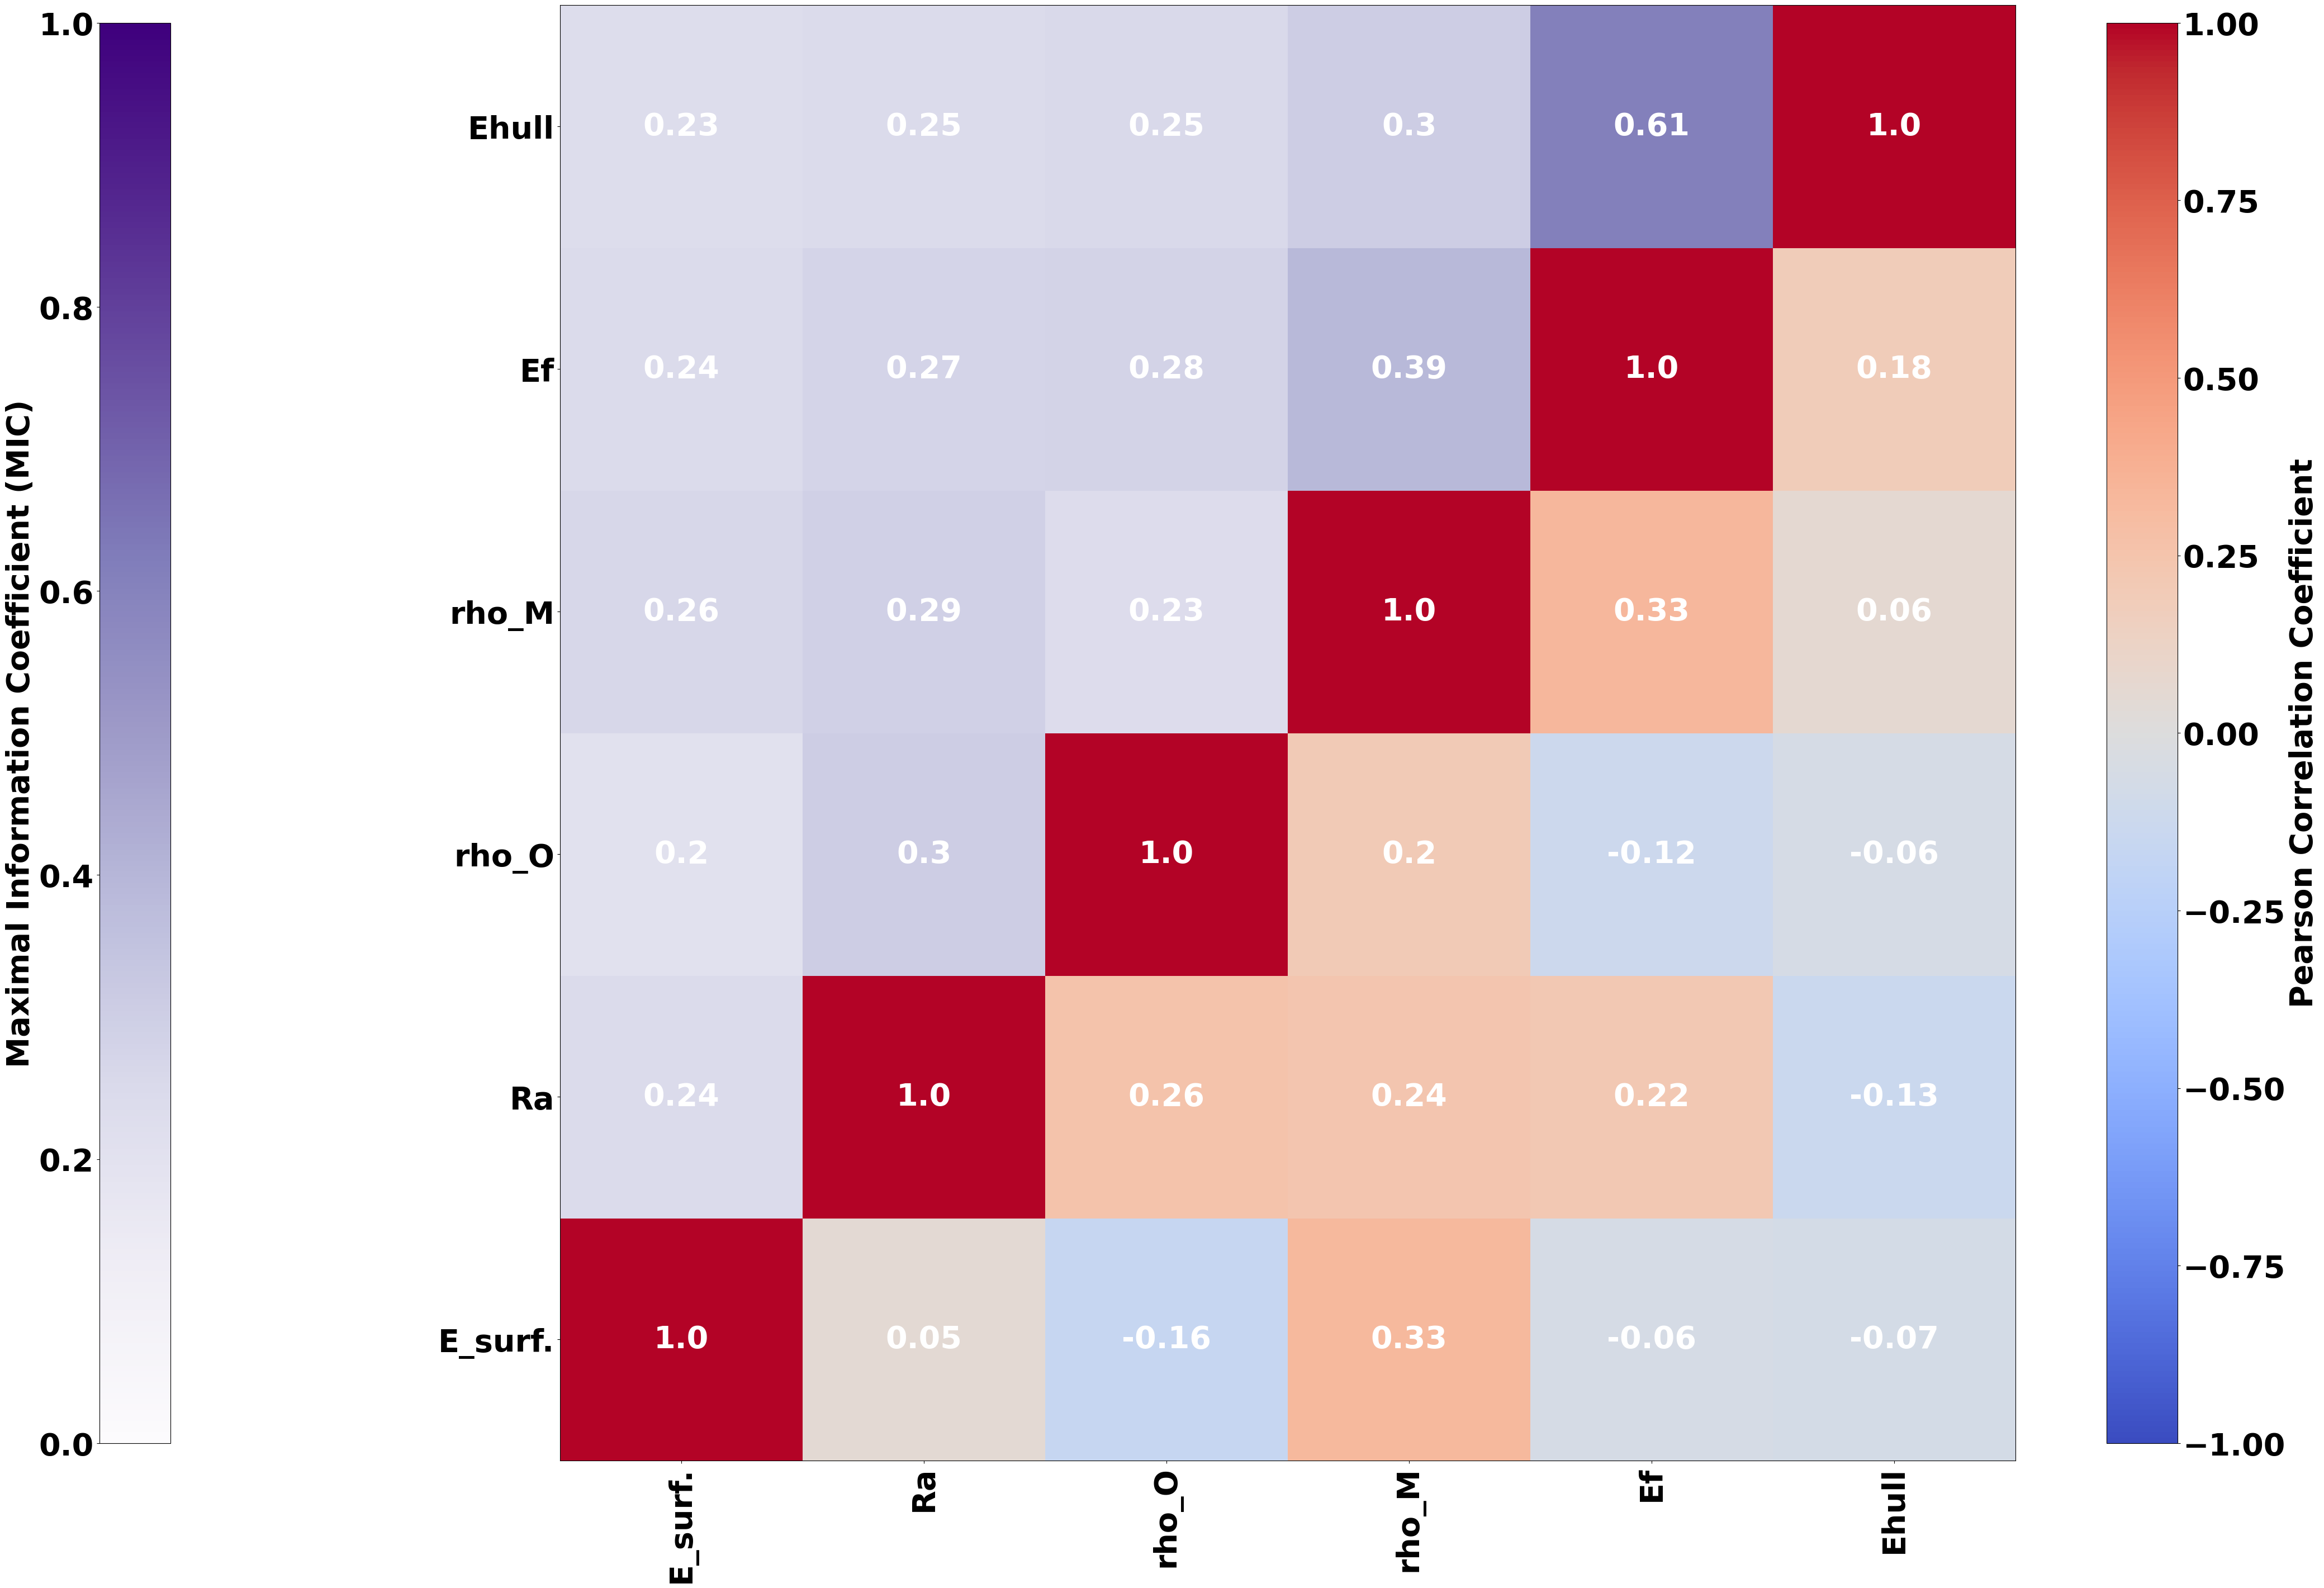

In [1]:
# Import necessary libraries
from scipy.stats import pearsonr
from minepy import MINE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['font.size'] = 40
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'

# Function to calculate Pearson correlation
def pearson_corr(x, y):
    return pearsonr(x, y)[0]

# Function to calculate Maximal Information Coefficient (MIC)
def calc_mic(x, y):
    mine = MINE()
    mine.compute_score(x, y)
    return mine.mic()

# Load the data
data = pd.read_csv('Total_set.csv')
#feature_names = ["E_surf.", "WF", "Ra", "NC_postive", "NC_negative", "Dipole_Z", "rho_O", "rho_M", "M_SBO", "O_SBO"]
feature_names = ["E_surf.", "Ra", "rho_O", "rho_M", "Ef", "Ehull"]
features = data[feature_names]

# Calculate pairwise Pearson correlations
pearson_corr_matrix = features.corr(method='pearson')

# Keep only upper triangle of the matrix
mask = np.triu(np.ones_like(pearson_corr_matrix, dtype=bool))
pearson_corr_matrix_upper = pearson_corr_matrix.where(mask)

# Calculate pairwise MICs
mic_matrix = features.apply(lambda x: features.apply(lambda y: calc_mic(x, y)))

# Keep only lower triangle of the matrix
mask = np.tril(np.ones_like(mic_matrix, dtype=bool))
mic_matrix_lower = mic_matrix.where(mask)

# Combine the two matrices
combined_matrix = pd.DataFrame(np.tril(mic_matrix_lower) + np.triu(pearson_corr_matrix_upper),
                               index=features.columns, 
                               columns=features.columns)

# Fill the diagonal with 1s
np.fill_diagonal(combined_matrix.values, 1)

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(60, 60))

# Plot the heatmap for MICs
mic_matrix_masked = np.ma.array(mic_matrix_lower.values, mask=np.isnan(mic_matrix_lower.values))
im1 = ax.imshow(mic_matrix_masked, cmap='Purples', vmin=0, vmax=1, extent=[0, len(features.columns), 0, len(features.columns)], origin='lower')
fig.colorbar(im1, ax=ax, location='left', use_gridspec=False, pad=0.15, shrink=0.55).set_label('Maximal Information Coefficient (MIC)', weight='bold')

# Plot the heatmap for Pearson correlations
pearson_matrix_masked = np.ma.array(pearson_corr_matrix_upper.values, mask=np.isnan(pearson_corr_matrix_upper.values))
im2 = ax.imshow(pearson_matrix_masked, cmap='coolwarm', vmin=-1, vmax=1, extent=[0, len(features.columns), 0, len(features.columns)], origin='lower')
fig.colorbar(im2, ax=ax, location='right', use_gridspec=False, pad=0.05, shrink=0.55).set_label('Pearson Correlation Coefficient', weight='bold')

# Set the labels for the x and y ticks
ax.set_xticks(np.arange(len(features.columns)) + 0.5, minor=False)
ax.set_yticks(np.arange(len(features.columns)) + 0.5, minor=False)
ax.set_xticklabels(features.columns, rotation=90)
ax.set_yticklabels(features.columns)

# Set the labels for the x and y ticks
ax.set_xticks(np.arange(len(features.columns)) + 0.5, minor=False)
ax.set_yticks(np.arange(len(features.columns)) + 0.5, minor=False)
ax.set_xticklabels(features.columns, rotation=90, weight='bold')
ax.set_yticklabels(features.columns, weight='bold')

# Display the numbers on the heatmap, but only for abs values greater than 0.70
for i in range(len(features.columns)):
    for j in range(len(features.columns)):
        if combined_matrix.values[i, j] > -1.0 or combined_matrix.values[i, j] < 1.0:
            text = ax.text(j + 0.5, i + 0.5, round(combined_matrix.values[i, j], 2),
               ha="center", va="center", color="w")

#plt.title("Combined Pearson Correlation (upper triangle) and MIC (lower triangle) Matrix")

# Save the figure
plt.savefig("combined_matrix.png", dpi=600)
plt.savefig("combined_matrix.svg")
# Show the figure
plt.show()
